## Data Set: Courts and Rinks
https://data.wprdc.org/dataset/playgrounds

Notebook created by: Jessica Flynn

In this notebook I will be evaluating what neighborhood in Pittsburgh is the best for befriending an alien based off the courts and rinks within Pittsburgh. We assume this is the first communication the aliens have had with humans. Sports are a great way to get exercise and bond with others. We need to determine which sport we will play with our potential alien friend along with what neighborhood is best suited for doing so. 

---



## Which Neighborhood has the best Courts/Rinks for befriending aliens?



The following code cells consist of Importing Pandas and getting our data from our data set.

In [99]:
# load pandas 
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [100]:
# load the Courts and Rinks data set
Courts_Rinks = pd.read_csv("https://data.wprdc.org/datastore/dump/a5b71bfa-840c-4c86-8f43-07a9ae854227")

Here is the first 10 entries we get from the WPRDC about Courts and Rinks in the Pittsburgh Area.

In [101]:
Courts_Rinks.head(10)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
5,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
6,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
7,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371
8,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.417990,-79.975053
9,229834077,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,NaN,Asphalt,0,f,South Side Flats,3,17,42003170200,3,17,3,4-24,40.427925,-79.986011


From the data set we can find what type of courts/rinks are in what neighborhoods are in Pittsburgh.

***

Here is the first question: 
## What kind of sport would be the easiest to play with an alien?

Here is a list of the different types of courts/rinks that Pittsburgh has:

In [102]:
print(Courts_Rinks["type"].unique())

['Basketball (Full)' 'Tennis' 'Basketball (Half)' 'General Sports'
 'Hockey' 'Dek Hockey' 'Pickleball' 'Lawn Bowling' 'Bocce' 'Volleyball'
 'Horseshoe Pit']


From these available rinks/courts we need to come up with a rational for which sport we want to play.

## Now we need to decide what earthly sport would be best suited to help befriend an alien...

- **Tennis** - Aliens could easily learn this sport, however aliens could be short and might have trouble hitting the ball over the net.

- **Hockey** - Aliens might have never experienced ice before, so putting them in a sport that requires interaction with ice might be overwhelming and stress out our alien.

- **Dek Hockey** - Aliens wouldn't have to learn how to skate or be afriad of ice however we want to choose a sport that is easy for aliens to learn and our alien might not be able to hold hockey stick.

- **Pickleball** - Most humans do not even know about pickleball so trying to teach an alien a sport we dont know will not work. 

- **Lawn Bowling** - Bowling might not be the best choice of sport when we are unsure about the number of fingers an alien would have. They might not be able to roll the bowling ball.

- **Bocce** - Like pickleball, Bocce is not very well known. It would be better to choose a sport that is more popular as it shows more cultural significance. 

- **Volleyball** - Volleyball requires a lot of height and also has many rules that would take a lot of time to explain.

- **Horseshoe** - Easy to explain, but we would like a more interactive and athletic sport for our alien. Also a sport with more cultural significance would be preferable. 

## What sport does that leave us? **Basketball.**

Basketball is pretty easy to explain. Ball goes in hoop. There are a few fouls that would need to be covered but in general this sport is one of the easiest to explain to our alien friends. There is also many different ways we could play instead of a normal game, like trying to play HORSE or just making free throws to enjoy a less intense version of the sport. Basketball is also really popular in many countries and would have good cultural significance. 

***


First, since we determined the best sport to play with an alien is basketball, lets **filter out** the sports that didn't make the cut! This way we can focus on only the basketball courts in Pittsburgh.

In [103]:
query_mask = Courts_Rinks['type'].str.contains("Basketball")

basketball = Courts_Rinks[query_mask]

basketball.head(10)


,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
5,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
6,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
7,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371
8,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.417990,-79.975053
9,229834077,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,NaN,Asphalt,0,f,South Side Flats,3,17,42003170200,3,17,3,4-24,40.427925,-79.986011
11,1120982972,Arsenal Basketball Court 1,Basketball (Full),Arsenal Park,NaN,Asphalt,0,f,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466928,-79.962253
17,1732101805,August Wilson Park Basketball Court 1,Basketball (Half),August Wilson Park,NaN,Asphalt,0,f,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.446677,-79.985667
18,647954390,Banksville Park Basketball Court 1,Basketball (Full),Banksville Park,NaN,Asphalt,0,f,Banksville,2,20,42003202300,5,20,6,4-9,40.414840,-80.038695


Now that we filtered our data set down to only basketball courts, we can count the number of basketball courts in each neighborhood.

Below is a table of the top 10 neighborhoods that have the most basketball courts.

In [104]:
tally = basketball['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')

tally.head(10)

,neighborhood,counts
0,Beechview,6
1,South Side Slopes,5
2,Hazelwood,5
3,Terrace Village,4
4,Squirrel Hill South,4
5,Beltzhoover,4
6,Elliott,4
7,Sheraden,4
8,Brookline,3
9,East Liberty,3


Here is a graph of the distribtutions of neighborhoods and how many courts they have. We can see that many neighborhoods have 1 court but only one neighborhood has 6 courts.

<AxesSubplot:xlabel='Number of Courts', ylabel='Number of Neighborhoods'>

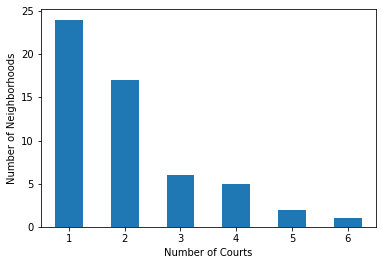

In [105]:
tally["counts"].value_counts().sort_index().plot(kind='bar', rot=0, xlabel = "Number of Courts", ylabel = "Number of Neighborhoods")

As shown in the table and the graph, we can see that according to the number of basketball courts in Pittsburgh, Beechview is the best neighborhood for befriending an alien!